## read csv and merge csv
## merge based on site and cover category and plot
## merge based on cover only and plot


In [1]:
import os
import pandas as pd
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
import matplotlib.colors as mcolors

In [23]:
# Define the directory containing the CSV files
root_dir = "home/jovyan/data-store/cross-sensor-cal/drone_cor_sup"  # Your directory



In [24]:
# geojson_path_underflights = "/home/jovyan/data-store/cross-sensor-cal/Datasets/analysis_ready_polygons/aop_polygons_1_24_2025_analysis_ready.geojson"
geojson_path_poly = "/data-store/iplant/home/shared/earthlab/macrosystems/field-data/analysis_ready_polygons/uas_polygons_1_24_2025_analysis_ready.geojson"
geojson_path_half_poly = "/data-store/iplant/home/shared/earthlab/macrosystems/field-data/analysis_ready_polygons/uas_polygons_1_24_2025_analysis_ready_half_diam.geojson"

aop_poly = "/data-store/iplant/home/shared/earthlab/macrosystems/field-data/analysis_ready_polygons/aop_polygons_1_24_2025_analysis_ready.geojson"
aop_poly_half = "/data-store/iplant/home/shared/earthlab/macrosystems/field-data/analysis_ready_polygons/aop_polygons_1_24_2025_analysis_ready_half_diam.geojson"
# geo_df_AOP = gpd.read_file(geojson_path_underflights)
geo_df_other = gpd.read_file(geojson_path_half_poly)

In [12]:
AOP_data_NIWO_2023 = pd.read_csv("/home/jovyan/data-store/cross-sensor-cal/drone_cor_sup/out_csv/NIWO_2023/merged_data_2023_08_NIWO_Micasense_masked.csv")
AOP_data_NIWO_2023.head()

/tmp/ipykernel_7112/504987971.py:1: DtypeWarning: Columns (17,20,29,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  AOP_data_NIWO_2023 = pd.read_csv("/home/jovyan/data-store/cross-sensor-cal/drone_cor_sup/out_csv/NIWO_2023/merged_data_2023_08_NIWO_Micasense_masked.csv")


,Masked_band_1,Masked_band_2,Masked_band_3,Masked_band_4,Masked_band_5,Masked_band_6,Masked_band_7,Masked_band_8,Masked_band_9,Masked_band_10,...,cover_category,og_flight_date,collection_date,collector_name,plot,location,woody_shrub_height,evt_class_field,shaded,geometry
0,331.255619,356.772687,648.513792,744.069755,570.240352,523.097145,1265.697946,1784.056225,2610.721383,3170.664572,...,Non-vegetated & dead,"Tue, 06 Jun 2023 16:11:10 GMT","Tue, 06 Jun 2023 16:09:59 GMT",Tyler,0,Gordon Gulch,NaN,NaN,NaN,POLYGON ((457156.84982023085 4428962.030341133...
1,324.511165,352.229936,643.600205,743.089423,577.437927,520.382590,1285.550363,1804.345555,2583.299791,3128.343651,...,Non-vegetated & dead,"Tue, 06 Jun 2023 16:11:10 GMT","Tue, 06 Jun 2023 16:09:59 GMT",Tyler,0,Gordon Gulch,NaN,NaN,NaN,POLYGON ((457156.84982023085 4428962.030341133...
2,330.795677,361.175548,674.824578,779.793457,605.003766,542.974655,1386.992507,1950.414683,2788.122634,3366.126848,...,Non-vegetated & dead,"Tue, 06 Jun 2023 16:11:10 GMT","Tue, 06 Jun 2023 16:09:59 GMT",Tyler,0,Gordon Gulch,NaN,NaN,NaN,POLYGON ((457156.84982023085 4428962.030341133...
3,370.564008,409.900007,735.205643,853.574429,715.997159,653.445284,1574.155677,2140.758293,2941.383596,3532.243856,...,Woody shrub,"Wed, 21 Jun 2023 17:57:34 GMT","Wed, 21 Jun 2023 17:57:27 GMT",Steelle,0,Lefthand,Over 1m,NaN,NaN,POLYGON ((457967.7606464209 4434207.1450376995...
4,333.268402,363.405273,660.373014,760.488478,587.208353,536.570009,1316.186588,1860.611771,2712.097900,3291.701549,...,Woody shrub,"Wed, 21 Jun 2023 17:57:34 GMT","Wed, 21 Jun 2023 17:57:27 GMT",Steelle,0,Lefthand,Over 1m,NaN,NaN,POLYGON ((457967.7606464209 4434207.1450376995...


In [15]:
AOP_data_NIWO_2023.columns

Index(['Masked_band_1', 'Masked_band_2', 'Masked_band_3', 'Masked_band_4',
       'Masked_band_5', 'Masked_band_6', 'Masked_band_7', 'Masked_band_8',
       'Masked_band_9', 'Masked_band_10', 'Polygon_ID', 'OBJECTID', 'GlobalID',
       'CreationDate', 'Creator', 'EditDate', 'Editor', 'description_notes',
       'dbh', 'tree_height', 'other_species', 'species', 'other_subcategory',
       'dead_subcategory', 'cover_subcategory', 'cover_category',
       'og_flight_date', 'collection_date', 'collector_name', 'plot',
       'location', 'woody_shrub_height', 'evt_class_field', 'shaded',
       'geometry'],
      dtype='object')

In [25]:
UAS_AOP_data_NIWO_2023 = pd.read_csv("/home/jovyan/data-store/cross-sensor-cal/drone_cor_sup/merged_data_2023_10cm_full.csv")
UAS_AOP_data_NIWO_2023.head()

,Polygon_ID,Pixel_ID,X_Coordinate,Y_Coordinate,444.0_nanometers,475.0_nanometers,531.0_nanometers,560.0_nanometers,650.0_nanometers,668.0_nanometers,705.0_nanometers,717.0_nanometers,740.0_nanometers,862.0_nanometers,cover_category,aop_site
0,777.0,777_0,457731.1,4432762.45,164.08130,197.20872,284.91028,320.44470,288.57385,276.58050,473.80475,602.67800,823.32324,1033.96310,Evergreen,NIWO/RMNP
1,777.0,777_1,457731.0,4432762.35,181.37220,199.45969,322.98413,361.88340,314.17130,289.94037,506.95940,673.11500,913.78864,1133.03390,Evergreen,NIWO/RMNP
2,777.0,777_2,457731.1,4432762.35,162.38625,191.78137,287.01395,330.92007,294.36725,282.33286,482.48505,630.01636,859.26090,1079.31190,Evergreen,NIWO/RMNP
3,777.0,777_3,457731.2,4432762.35,157.32904,186.70758,280.57178,317.01688,293.72860,282.72934,476.66790,608.00180,810.88873,1021.48676,Evergreen,NIWO/RMNP
4,777.0,777_4,457731.3,4432762.35,167.90959,196.28935,291.13280,316.19586,300.89346,301.24026,486.50058,606.93097,796.27840,1004.14550,Evergreen,NIWO/RMNP


In [26]:
geo_df_other = gpd.read_file(geojson_path_poly)

In [29]:
 #--- 3. Check column names ---
print("CSV Columns:", UAS_AOP_data_NIWO_2023.columns)
print("GeoJSON Columns:", geo_df_other.columns)
# --- 4. Rename GeoJSON column if needed ---
if "OBJECTID" in geo_df_other.columns and "Polygon_ID" not in geo_df_other.columns:
    geo_df_other = geo_df_other.rename(columns={"OBJECTID": "Polygon_ID"})

# --- 5. Perform an INNER JOIN on "Polygon_ID" (keeping only matching IDs) ---
merged_df_uas_AOP = UAS_AOP_data_NIWO_2023.merge(geo_df_other[['Polygon_ID','cover_category','aop_site']], on="Polygon_ID", how="inner")  # Allows duplicates in CSV

# --- 6. Check the merged data ---
print("Merged DataFrame Shape:", merged_df_uas_AOP.shape)
print(merged_df_uas_AOP.head())

# Save merged file (optional)
# merged_df_uas_AOP.to_csv("merged_df_uas_AOP_half_2023.csv", index=False)

CSV Columns: Index(['Polygon_ID', 'Pixel_ID', 'X_Coordinate', 'Y_Coordinate',
       '444.0_nanometers', '475.0_nanometers', '531.0_nanometers',
       '560.0_nanometers', '650.0_nanometers', '668.0_nanometers',
       '705.0_nanometers', '717.0_nanometers', '740.0_nanometers',
       '862.0_nanometers', 'cover_category', 'aop_site'],
      dtype='object')
GeoJSON Columns: Index(['Polygon_ID', 'GlobalID', 'Shape__Area', 'Shape__Length',
       'CreationDate', 'Creator', 'EditDate', 'Editor', 'cover_subcategory',
       'cover_category', 'og_flight_date', 'plot', 'location',
       'collection_date', 'collector_name', 'description_notes', 'dbh',
       'tree_height', 'woody_shrub_height', 'other_species', 'species',
       'other_subcategory', 'dead_subcategory', 'evt_class_field', 'shaded',
       'imagery', 'field_year', 'state', 'aop_site',
       'combined_all_category_species', 'area_m', 'geometry'],
      dtype='object')
Merged DataFrame Shape: (788452, 18)
   Polygon_ID Pixel_ID 

In [31]:
merged_df_uas_AOP.columns

Index(['Polygon_ID', 'Pixel_ID', 'X_Coordinate', 'Y_Coordinate',
       '444.0_nanometers', '475.0_nanometers', '531.0_nanometers',
       '560.0_nanometers', '650.0_nanometers', '668.0_nanometers',
       '705.0_nanometers', '717.0_nanometers', '740.0_nanometers',
       '862.0_nanometers', 'cover_category_x', 'aop_site_x',
       'cover_category_y', 'aop_site_y'],
      dtype='object')

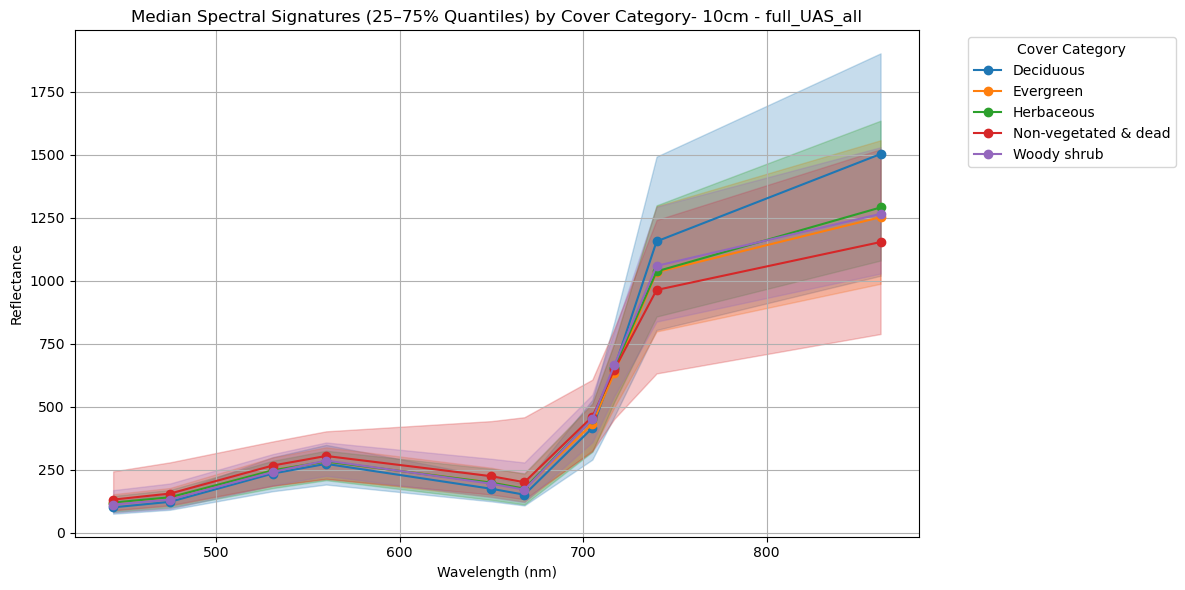

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import to_hex
import matplotlib.colors as mcolors

# --- 1. Identify spectral bands ---
spectral_columns = [col for col in merged_df_uas_AOP.columns if "_nanometers" in col]

# # --- 4. Extract spectral band columns (assuming they contain "_nanometers") ---
# spectral_columns = [col for col in merged_df.columns if "_nanometers" in col]
# --- 2. Define wavelengths ---
wavelengths = [444.0, 475.0, 531.0, 560.0, 650.0, 668.0, 705.0, 717.0, 740.0, 862.0]
column_mapping = {f"_nanometers{i+1}": wavelengths[i] for i in range(10)}

# --- 3. Group by category ---
grouped = merged_df_uas_AOP.groupby("cover_category_y")[spectral_columns]

median_spectra = grouped.median().rename(columns=column_mapping)
quantile_25 = grouped.quantile(0.25).rename(columns=column_mapping)
quantile_75 = grouped.quantile(0.75).rename(columns=column_mapping)

# --- 4. Color setup ---
categories = median_spectra.index.tolist()
base_cmap = plt.get_cmap('tab10')
base_colors = {cat: base_cmap(i) for i, cat in enumerate(categories)}

# Optional: adjust brightness if needed
color_dict = {cat: to_hex(base_colors[cat]) for cat in categories}

# --- 5. Plotting ---
plt.figure(figsize=(12, 6))

for category in categories:
    median_vals = median_spectra.loc[category]
    q25_vals = quantile_25.loc[category]
    q75_vals = quantile_75.loc[category]

    plt.plot(wavelengths, median_vals, label=category, color=color_dict[category], marker='o')
    plt.fill_between(wavelengths, q25_vals, q75_vals, color=color_dict[category], alpha=0.25)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.title("Median Spectral Signatures (25–75% Quantiles) by Cover Category- 10cm - full_UAS_all")
plt.legend(title="Cover Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()

# --- Save and show ---
output_plot_path = "/home/jovyan/data-store/cross-sensor-cal/drone_cor_sup/NEON_UAS_AOP_all_sites_full_UAS_all_10cm.png"
plt.savefig(output_plot_path, dpi=300, bbox_inches='tight')
plt.show()


# median_spectra.to_csv("median_spectra.csv")
# q25_spectra.to_csv("quantile25_spectra.csv")
# q75_spectra.to_csv("quantile75_spectra.csv")


# FOR AOP data plot

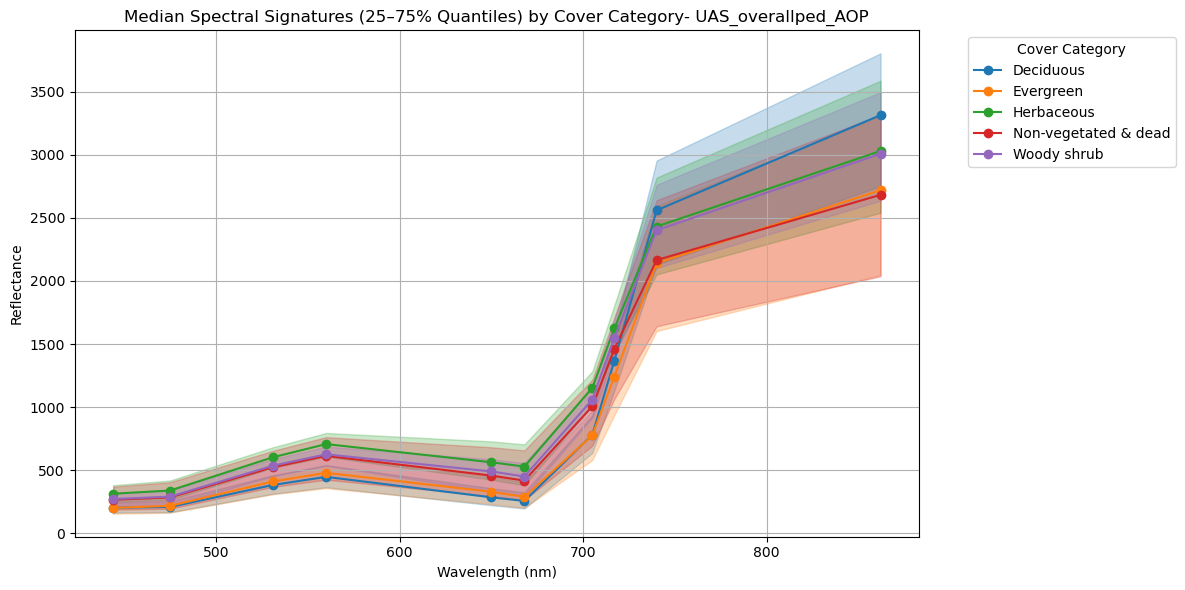

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import to_hex
import matplotlib.colors as mcolors

# --- 1. Identify spectral bands ---
spectral_columns = [col for col in AOP_data_NIWO_2023.columns if "Masked_band_" in col]

# # --- 4. Extract spectral band columns (assuming they contain "_nanometers") ---
# spectral_columns = [col for col in merged_df.columns if "_nanometers" in col]
# --- 2. Define wavelengths ---
wavelengths = [444.0, 475.0, 531.0, 560.0, 650.0, 668.0, 705.0, 717.0, 740.0, 862.0]
column_mapping = {f"Masked_band_{i+1}": wavelengths[i] for i in range(10)}

# --- 3. Group by category ---
grouped = AOP_data_NIWO_2023.groupby("cover_category")[spectral_columns]

median_spectra = grouped.median().rename(columns=column_mapping)
quantile_25 = grouped.quantile(0.25).rename(columns=column_mapping)
quantile_75 = grouped.quantile(0.75).rename(columns=column_mapping)

# --- 4. Color setup ---
categories = median_spectra.index.tolist()
base_cmap = plt.get_cmap('tab10')
base_colors = {cat: base_cmap(i) for i, cat in enumerate(categories)}

# Optional: adjust brightness if needed
color_dict = {cat: to_hex(base_colors[cat]) for cat in categories}

# --- 5. Plotting ---
plt.figure(figsize=(12, 6))

for category in categories:
    median_vals = median_spectra.loc[category]
    q25_vals = quantile_25.loc[category]
    q75_vals = quantile_75.loc[category]

    plt.plot(wavelengths, median_vals, label=category, color=color_dict[category], marker='o')
    plt.fill_between(wavelengths, q25_vals, q75_vals, color=color_dict[category], alpha=0.25)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.title("Median Spectral Signatures (25–75% Quantiles) by Cover Category- UAS_overallped_AOP")
plt.legend(title="Cover Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()

# --- Save and show ---
output_plot_path = "/home/jovyan/data-store/cross-sensor-cal/drone_cor_sup/NEON_AOP_UAS_ovelapped.png"
plt.savefig(output_plot_path, dpi=300, bbox_inches='tight')
plt.show()


# median_spectra.to_csv("median_spectra.csv")
# q25_spectra.to_csv("quantile25_spectra.csv")
# q75_spectra.to_csv("quantile75_spectra.csv")


In [13]:

# root_dir = "/data-store/iplant/home/shared/earthlab/macrosystems/field-data/output/summer-2023-10cm-10k"  # Your directory
# Define the GeoJSON file path
# geojson_path = "/data-store/iplant/home/shared/earthlab/macrosystems/field-data/analysis_ready_polygons/uas_polygons_1_24_2025_analysis_ready_half_diam.geojson"  # Your file

# Define target file pattern
target_suffix = "08_NIWO_Micasense_masked.csv"

# List to store DataFrames
df_list = []

# Recursively search and read CSV files in subdirectories
for file_path in Path(root_dir).rglob("*.csv"):
    if file_path.name.endswith(target_suffix):  # Check if filename ends with 'pixel.csv'
        try:
            df = pd.read_csv(file_path)
            df_list.append(df)
            print(f"Loaded: {file_path}")
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

# Combine all CSV files into one DataFrame
if df_list:
    combined_df_2023 = pd.concat(df_list, ignore_index=True)
    print(f"Combined DataFrame Shape: {combined_df_2023.shape}")
else:
    print("No matching CSV files found.")
    combined_df_2023 = None

# # Load the GeoJSON file
# geo_df = gpd.read_file(geojson_path)

# # Merge if 'ID' exists in both
# if combined_df is not None and "ID" in combined_df.columns and "ID" in geo_df.columns:
#     merged_df = geo_df.merge(combined_df, on="ID", how="inner")
#     print(f"Merged DataFrame Shape: {merged_df.shape}")

#     # Display merged DataFrame
#     import ace_tools as tools
#     tools.display_dataframe_to_user(name="Merged Geo Data", dataframe=merged_df)
# else:
#     print("ID column missing in either CSVs or GeoJSON, or no CSVs loaded.")


No matching CSV files found.


In [ ]:
all_data_NIWO_2023 = pd.concat([df1,df2],ignore_index=True)
all_data_NIWO_2023.head()
print(all_data_NIWO_2023.columns)

## match only the Polygon_IDs in another DataFrame

In [18]:
merged_df_uas_AOP.columns

Index(['Polygon_ID', 'Pixel_ID', 'X_Coordinate', 'Y_Coordinate',
       '444.0_nanometers', '475.0_nanometers', '531.0_nanometers',
       '560.0_nanometers', '650.0_nanometers', '668.0_nanometers',
       '705.0_nanometers', '717.0_nanometers', '740.0_nanometers',
       '862.0_nanometers', 'cover_category', 'aop_site'],
      dtype='object')

In [20]:
# Suppose you have:
# df_all: the full DataFrame
# df_subset: a smaller DataFrame with a list of Polygon_IDs to match

# Step 1: Extract unique Polygon_IDs from df_subset
polygon_ids = merged_df_uas_AOP["Polygon_ID"].unique()

# Step 2: Filter rows in df_all that match those Polygon_IDs
matching_rows = AOP_data_NIWO_2023[AOP_data_NIWO_2023["OBJECTID"].isin(polygon_ids)]


In [21]:
matching_rows.head()

,Masked_band_1,Masked_band_2,Masked_band_3,Masked_band_4,Masked_band_5,Masked_band_6,Masked_band_7,Masked_band_8,Masked_band_9,Masked_band_10,...,cover_category,og_flight_date,collection_date,collector_name,plot,location,woody_shrub_height,evt_class_field,shaded,geometry
1441,430.757537,493.723115,748.993500,892.331251,849.021302,804.045053,1392.984003,1823.836926,2454.286769,2881.027306,...,Herbaceous,"Wed, 14 Jun 2023 15:39:56 GMT","Wed, 14 Jun 2023 15:39:36 GMT",Tyler,0,Gold Hill Road,NaN,NaN,NaN,POLYGON ((457742.11584232753 4432764.282468524...
1442,540.105856,620.440642,945.446905,1116.955114,1096.812328,1022.928908,1723.858448,2242.968095,3070.703302,3623.399384,...,Herbaceous,"Wed, 14 Jun 2023 15:39:56 GMT","Wed, 14 Jun 2023 15:39:36 GMT",Tyler,0,Gold Hill Road,NaN,NaN,NaN,POLYGON ((457742.11584232753 4432764.282468524...
1452,430.757537,493.723115,748.993500,892.331251,849.021302,804.045053,1392.984003,1823.836926,2454.286769,2881.027306,...,Herbaceous,"Wed, 14 Jun 2023 15:39:56 GMT","Wed, 14 Jun 2023 15:39:36 GMT",Tyler,0,Gold Hill Road,NaN,NaN,NaN,POLYGON ((457742.11584232753 4432764.282468524...
1453,540.105856,620.440642,945.446905,1116.955114,1096.812328,1022.928908,1723.858448,2242.968095,3070.703302,3623.399384,...,Herbaceous,"Wed, 14 Jun 2023 15:39:56 GMT","Wed, 14 Jun 2023 15:39:36 GMT",Tyler,0,Gold Hill Road,NaN,NaN,NaN,POLYGON ((457742.11584232753 4432764.282468524...
1461,199.734230,206.272953,311.159519,383.076748,322.140151,299.878677,589.323345,846.368546,1238.301938,1486.009335,...,Herbaceous,"Wed, 14 Jun 2023 15:39:56 GMT","Wed, 14 Jun 2023 15:39:36 GMT",Tyler,0,Gold Hill Road,NaN,NaN,NaN,POLYGON ((457742.11584232753 4432764.282468524...


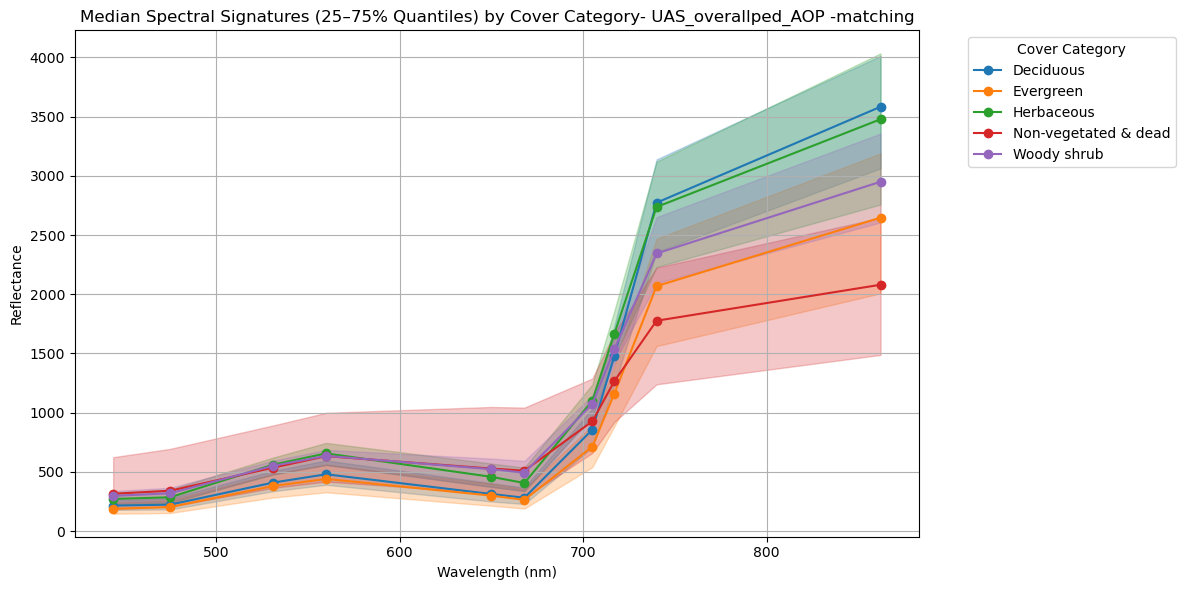

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import to_hex
import matplotlib.colors as mcolors

# --- 1. Identify spectral bands ---
spectral_columns = [col for col in matching_rows.columns if "Masked_band_" in col]

# # --- 4. Extract spectral band columns (assuming they contain "_nanometers") ---
# spectral_columns = [col for col in merged_df.columns if "_nanometers" in col]
# --- 2. Define wavelengths ---
wavelengths = [444.0, 475.0, 531.0, 560.0, 650.0, 668.0, 705.0, 717.0, 740.0, 862.0]
column_mapping = {f"Masked_band_{i+1}": wavelengths[i] for i in range(10)}

# --- 3. Group by category ---
grouped = matching_rows.groupby("cover_category")[spectral_columns]

median_spectra = grouped.median().rename(columns=column_mapping)
quantile_25 = grouped.quantile(0.25).rename(columns=column_mapping)
quantile_75 = grouped.quantile(0.75).rename(columns=column_mapping)

# --- 4. Color setup ---
categories = median_spectra.index.tolist()
base_cmap = plt.get_cmap('tab10')
base_colors = {cat: base_cmap(i) for i, cat in enumerate(categories)}

# Optional: adjust brightness if needed
color_dict = {cat: to_hex(base_colors[cat]) for cat in categories}

# --- 5. Plotting ---
plt.figure(figsize=(12, 6))

for category in categories:
    median_vals = median_spectra.loc[category]
    q25_vals = quantile_25.loc[category]
    q75_vals = quantile_75.loc[category]

    plt.plot(wavelengths, median_vals, label=category, color=color_dict[category], marker='o')
    plt.fill_between(wavelengths, q25_vals, q75_vals, color=color_dict[category], alpha=0.25)

plt.xlabel("Wavelength (nm)")
plt.ylabel("Reflectance")
plt.title("Median Spectral Signatures (25–75% Quantiles) by Cover Category- UAS_overallped_AOP -matching")
plt.legend(title="Cover Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()

# --- Save and show ---
output_plot_path = "/home/jovyan/data-store/cross-sensor-cal/drone_cor_sup/NEON_AOP_UAS_ovelapped_matching.png"
plt.savefig(output_plot_path, dpi=300, bbox_inches='tight')
plt.show()


# median_spectra.to_csv("median_spectra.csv")
# q25_spectra.to_csv("quantile25_spectra.csv")
# q75_spectra.to_csv("quantile75_spectra.csv")